In [1]:
## Build makemore

In [2]:
import random
import pandas as pd

In [3]:
words = []
with open('names.txt','r') as name_files:
    lines = name_files.readlines()
    for line in lines:
        words.append(line.strip())
        
print(len(words))
random.choices(words,k=10)

32033


['terrae',
 'aashrith',
 'dylin',
 'ronak',
 'roselena',
 'feiga',
 'gaea',
 'evangeline',
 'lanson',
 'ky']

In [4]:
shortest = min(len(w) for w in words)
longest = max(len(w) for w in words)

print(f'shortest word is {shortest} character length \nlongest word is {longest} character length')

shortest word is 2 character length 
longest word is 15 character length


In [5]:
b = {}
for w in words[:3]:
    print(w)
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1
        print(ch1,ch2)
print(b)

emma
<S> e
e m
m m
m a
a <E>
olivia
<S> o
o l
l i
i v
v i
i a
a <E>
ava
<S> a
a v
v a
a <E>
{('<S>', 'e'): 1, ('e', 'm'): 1, ('m', 'm'): 1, ('m', 'a'): 1, ('a', '<E>'): 3, ('<S>', 'o'): 1, ('o', 'l'): 1, ('l', 'i'): 1, ('i', 'v'): 1, ('v', 'i'): 1, ('i', 'a'): 1, ('<S>', 'a'): 1, ('a', 'v'): 1, ('v', 'a'): 1}


In [6]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1



In [7]:
sorted(b.items(),key=lambda kv: kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [8]:
import torch

In [9]:
a = torch.zeros((3,5),dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [10]:
a.dtype

torch.int32

In [11]:
N = torch.zeros((27,27),dtype = torch.int32)
abc = sorted(list(set(''.join(words))))

In [12]:
stoi = {s:i+1 for i,s in enumerate(abc)}
stoi['.'] = 0
itos = {s:i for i,s in stoi.items()}
itos


{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [13]:

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1



<AxesSubplot:>

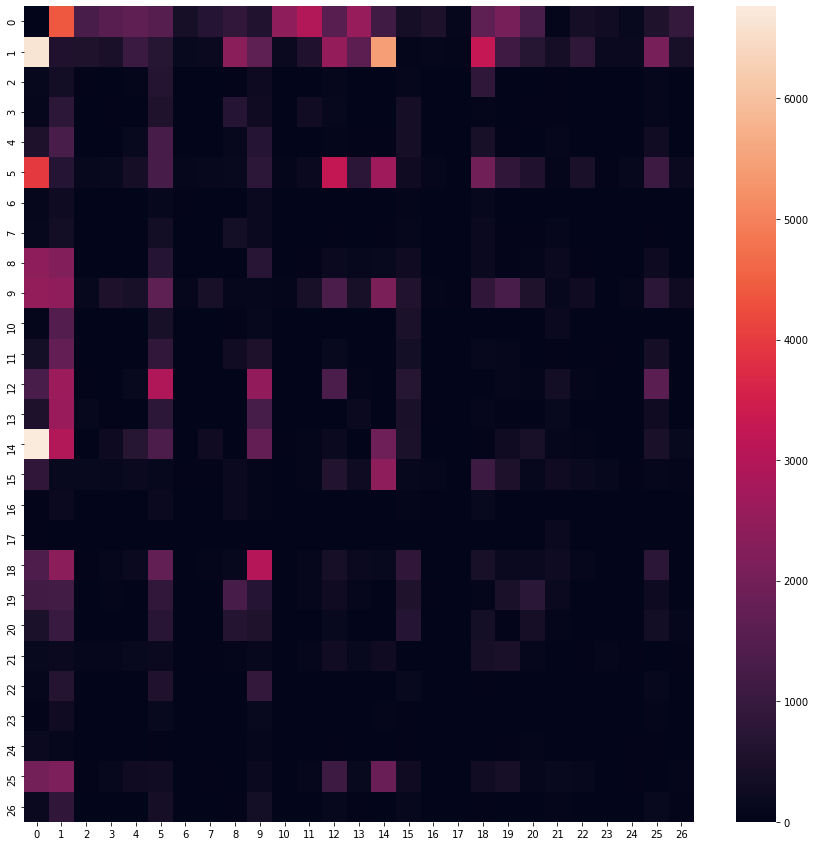

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(
    N, annot=False,
    ax=ax
)

In [15]:
N[0,:].shape

torch.Size([27])

In [16]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [17]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
itos[ix]

'm'

In [18]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3,generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [19]:
torch.multinomial(p,num_samples=20,replacement=True,generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [20]:

g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(
            p,num_samples=1,replacement=True,generator=g
        ).item()
        out.append(itos[ix])
        if ix == 0:
            break
    
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


In [21]:

g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        p = torch.ones(27)/27.0
        # p = N[ix].float()
        # p = p / p.sum()
        ix = torch.multinomial(
            p,num_samples=1,replacement=True,generator=g
        ).item()
        out.append(itos[ix])
        if ix == 0:
            break
    
    print(''.join(out))

qvsaayxbqrqmyqwuznivanukotdjvdhd.
qnoymtzduqkatdetkpfjdgigvlejfkrsqlwnirghhzwlu.
idcx.
cekmzucjnjoeovjvrggqrjr.
cfbhabkslpokc.
xtxwbpmknuusxdgzfexhwqpldpdnwzvkyxsqjforqqpfxstwkfoufhvwfhmsuyyotvcvvqpfcbydjcouhkajkhqnnpqmmllaordqy.
gszpw.
zlgijinangzzuulsyvqrufuawavsdbnwvlmrypvgrsfgpshgnmwafqmsjdvbhngvoiigxhkwdltrdkwnagzyknqv.
lfstdqigvncdoidetsukgdp.
cfpjsxeqjcsmjwguzes.
woflfjxflylgbegpjdpovdtw.
dlzysqtrbhxhcdneiuum.
xtyslfbmaboaanyjpojuujflcsaucqcgtjmlzqtbaisvxrtgupkppigxudejdzsroqeigovuxmvt.
jlxfolkozci.
tkhdivkdifaxcevlpktkwwvuxlymtwylgpzauwdvxfvbooflddphmjeomjgjcqeqwt.
.
wlxclcjbm.
quuyijtnzmycshclormjyrerqslomdrlbuwqnlmitbrmqhtbdwbyvlsmwnborwcdhjotezwnsxuvffvinrmedelubhdfgtavxqfgmnyqrygyevxaapbjtnwfnwewqxerdytttvfo.
iauarz.
tynoqkyp.


In [22]:
P = N.float()
P = P / P.sum(1,keepdim=True)


In [23]:
P.sum(0,keepdim=False)

tensor([3.0222, 5.3565, 0.1736, 0.2190, 0.3738, 3.2511, 0.0998, 0.1226, 1.1718,
        2.7717, 0.1117, 0.3225, 1.1667, 0.3955, 1.2709, 1.3686, 0.0982, 0.0176,
        1.6144, 0.7225, 0.5680, 1.2080, 0.1528, 0.1190, 0.0971, 1.0224, 0.1818])

In [24]:

g = torch.Generator().manual_seed(92147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(
            p,num_samples=1,replacement=True,generator=g
        ).item()
        out.append(itos[ix])
        if ix == 0:
            break
    
    print(''.join(out))

sh.
masaa.
vamy.
mu.
l.


In [25]:
log_likelihood = 0.0
n = 0
#for w in words:
for w in ['julijq']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print(log_likelihood)
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

.j: 0.0756 -2.5822
ju: 0.0697 -2.6642
ul: 0.0960 -2.3433
li: 0.1777 -1.7278
ij: 0.0043 -5.4506
jq: 0.0000 -inf
q.: 0.1029 -2.2736
tensor(-inf)
nll=tensor(inf)
nll/n=tensor(inf)


In [26]:
P = (N+1).float()
P /= P.sum(1,keepdims=True)

In [27]:
log_likelihood = 0.0
n = 0
#for w in words:
for w in ['emma']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print(log_likelihood)
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

.e: 0.0478 -3.0410
em: 0.0377 -3.2793
mm: 0.0253 -3.6753
ma: 0.3885 -0.9454
a.: 0.1958 -1.6305
tensor(-12.5716)
nll=tensor(12.5716)
nll/n=tensor(2.5143)


## NEural network
### Create dataset bigrams

In [28]:
xs, ys = [],[]

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

   

In [29]:
xs

tensor([ 0,  5, 13, 13,  1])

In [30]:
ys

tensor([ 5, 13, 13,  1,  0])

In [31]:
import torch.nn.functional as F

In [32]:
xenc = F.one_hot(xs,num_classes=27).float()
xenc.shape

torch.Size([5, 27])

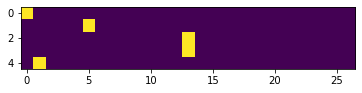

In [33]:
plt.imshow(xenc)

In [34]:
W = torch.randn(27,27)

In [35]:
print(xenc.shape, W.shape) 

torch.Size([5, 27]) torch.Size([27, 27])


In [36]:
xenc @ W

tensor([[-1.8597, -0.2423, -0.1304, -1.6410,  0.9478,  0.1094, -0.1095, -0.5764,
          0.4655,  1.5353,  0.4323, -0.8563,  0.7608,  0.2576, -0.0872, -1.4772,
          0.8077, -0.1806, -0.1021,  1.1223,  0.1295, -2.1925,  1.9545,  0.5276,
         -0.8401, -0.2790,  0.5390],
        [-0.6635, -0.1866, -1.5485,  1.4168, -1.2898,  0.1406, -0.6241, -0.2570,
         -1.2206,  0.4868,  1.1058,  0.3452, -0.6257, -0.3550, -0.3799, -0.4574,
          0.1695,  0.3101, -1.7290, -0.4543, -0.0218, -0.8278, -1.1834,  0.7902,
          0.1685, -1.1272, -0.6891],
        [-2.1228,  0.5800,  0.3108,  0.7541, -0.2766, -0.1429,  0.8428,  0.1565,
         -0.6104,  1.5615,  0.3451, -1.1485,  2.2243, -0.0509,  1.7831, -0.1132,
         -0.5568,  0.5597,  1.1206,  1.0086, -0.0123, -1.0376, -0.9065,  1.7763,
         -0.0712, -0.0228, -1.1801],
        [-2.1228,  0.5800,  0.3108,  0.7541, -0.2766, -0.1429,  0.8428,  0.1565,
         -0.6104,  1.5615,  0.3451, -1.1485,  2.2243, -0.0509,  1.7831, -0.1132

In [37]:
#calculate exponentiate
logist = (xenc @ W)
counts = logist.exp()
counts

tensor([[ 0.1557,  0.7849,  0.8777,  0.1938,  2.5800,  1.1156,  0.8963,  0.5619,
          1.5928,  4.6425,  1.5407,  0.4247,  2.1399,  1.2939,  0.9165,  0.2283,
          2.2428,  0.8348,  0.9029,  3.0720,  1.1382,  0.1116,  7.0604,  1.6949,
          0.4317,  0.7566,  1.7142],
        [ 0.5151,  0.8298,  0.2126,  4.1240,  0.2753,  1.1510,  0.5358,  0.7733,
          0.2951,  1.6271,  3.0216,  1.4122,  0.5349,  0.7012,  0.6840,  0.6329,
          1.1848,  1.3636,  0.1775,  0.6349,  0.9785,  0.4370,  0.3062,  2.2038,
          1.1836,  0.3239,  0.5020],
        [ 0.1197,  1.7860,  1.3645,  2.1257,  0.7584,  0.8669,  2.3229,  1.1695,
          0.5431,  4.7660,  1.4121,  0.3171,  9.2470,  0.9504,  5.9480,  0.8930,
          0.5730,  1.7502,  3.0668,  2.7418,  0.9878,  0.3543,  0.4039,  5.9081,
          0.9313,  0.9775,  0.3073],
        [ 0.1197,  1.7860,  1.3645,  2.1257,  0.7584,  0.8669,  2.3229,  1.1695,
          0.5431,  4.7660,  1.4121,  0.3171,  9.2470,  0.9504,  5.9480,  0.8930

In [38]:
prob_counts = counts / counts.sum(1,keepdim=True)
prob_counts.sum(1)

tensor([1., 1., 1., 1., 1.])

In [39]:
torch.linspace(0.01,1,5)

tensor([0.0100, 0.2575, 0.5050, 0.7525, 1.0000])

In [40]:
torch.log(torch.linspace(0.00001,1,5))

tensor([-11.5129,  -1.3863,  -0.6931,  -0.2877,   0.0000])

### optimize weights using gradient descent single iteration

in this section will be built the dataset again

In [41]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [42]:
xs, ys = [],[]

number_words = 1

for w in words[:number_words]:
    print(w)
    chs = ['.'] + list(w) + ['.']
    print(chs)
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(xs)
print(ys)

emma
['.', 'e', 'm', 'm', 'a', '.']
tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [43]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27),generator = g, requires_grad=True)


In [44]:
xenc = F.one_hot(xs,num_classes=27).float()
print("Shape of input and weights")
print(xenc.shape)
print(W.shape)

logits = xenc @ W 
counts = logits.exp()
probs = counts / counts.sum(1,keepdim=True)
print(f"probs: {probs.shape}")
loss = -probs[torch.arange(5),ys].log().mean()
print(f'loss: {loss}')

Shape of input and weights
torch.Size([5, 27])
torch.Size([27, 27])
probs: torch.Size([5, 27])
loss: 3.7693049907684326


In [45]:
# backward pass

W.grad = None

loss.backward()

In [46]:
W.data += -0.1 * W.grad

## optimize using gradient descent multiple iterations

In [47]:
# Dictionary of the alaphabet
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [48]:
# build dataset

xs, ys = [],[]

number_words = 1

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(num)

228146


In [49]:
# Initialize weights
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27),generator = g, requires_grad=True)

In [50]:
## gradient descent loop 

for k in range(1000):

    # Forward pass
    xenc = F.one_hot(xs,num_classes=27).float()
    logits = xenc @ W 
    counts = logits.exp()
    probs = counts / counts.sum(1,keepdim=True)
    loss = -probs[torch.arange(num),ys].log().mean() + 0.01*(W**2).mean()
    
    if k % 100 == 0:
        print(loss.item())
    #backward pass
    
    W.grad = None 
    loss.backward()
    
    #update
    
    W.data += -50 * W.grad



3.768618583679199
2.4899587631225586
2.4829697608947754
2.481499195098877
2.4809746742248535
2.4807369709014893
2.4806125164031982
2.4805402755737305
2.4804952144622803
2.480466365814209


In [51]:
#predict and get a sample

g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    
    while True:
        xencp = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logist = xencp @ W 
        counts = logist.exp()
        p = counts / counts.sum(1, keepdim=True)
        ix = torch.multinomial(p,num_samples=1, replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break 
    print(''.join(out))


mor.
axx.
minaymoryles.
kondlaisah.
anchthizarie.
